# Logistic Regression 1

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
 
np.random.seed(3)
num_pos = 5000
 
# Bivariate normal distribution mean [0, 0] [0.5, 4], with a covariance matrix
subset1 = np.random.multivariate_normal([0, 0], [[1, 0.6],[0.6, 1]], num_pos)
subset2 = np.random.multivariate_normal([0.5, 4], [[1, 0.6],[0.6, 1]], num_pos)
 
X = np.vstack((subset1, subset2))
y = np.hstack((np.zeros(num_pos), np.ones(num_pos)))

In [2]:
X.shape

(10000, 2)

In [3]:
y

array([ 0.,  0.,  0., ...,  1.,  1.,  1.])

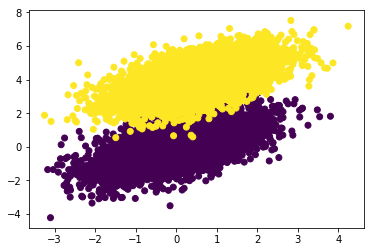

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y);

In [5]:
from sklearn import linear_model

clf = linear_model.LogisticRegression()
clf.fit(X, y)
print(clf.intercept_, clf.coef_, clf.classes_)

[-8.47053414] [[-2.19855235  4.54589066]] [ 0.  1.]


In [6]:
prob = clf.predict_proba([[0, 0], [1, 4]])
print(prob)

[[  9.99790491e-01   2.09509039e-04]
 [  5.44838493e-04   9.99455162e-01]]


In [7]:
prob.round(3)

array([[ 1.   ,  0.   ],
       [ 0.001,  0.999]])

In [8]:
y_pred = clf.predict(X)
print(y_pred)

[ 0.  0.  0. ...,  1.  1.  1.]


In [9]:
clf.coef_[0]

array([-2.19855235,  4.54589066])

In [10]:
clf.coef_.shape

(1, 2)

In [11]:
x_beta = clf.intercept_ + clf.coef_[0,0] * X[:,0] + clf.coef_[0,1] * X[:,1] 
y_pred = 1 / (1 + np.exp(-x_beta))


In [12]:
y_pred_round = y_pred.round()
print(y_pred_round)

[ 0.  0.  0. ...,  1.  1.  1.]


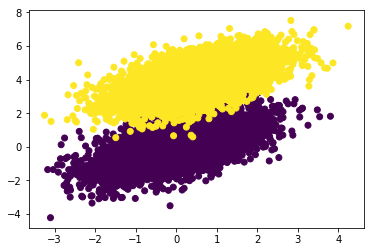

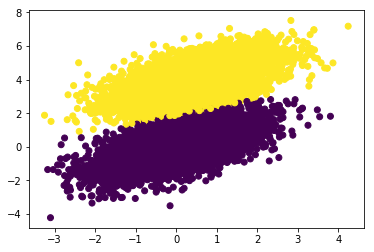

In [13]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_pred_round);

In [14]:
from sklearn import metrics

In [15]:
metrics.confusion_matrix(y, y_pred_round)

array([[4942,   58],
       [  50, 4950]])

In [16]:
metrics.accuracy_score(y, y_pred_round)

0.98919999999999997

In [17]:
metrics.precision_score(y, y_pred_round)

0.98841853035143767

In [18]:
metrics.recall_score(y, y_pred_round)

0.98999999999999999

In [19]:
metrics.f1_score(y, y_pred_round)

0.98920863309352514

In [20]:
print(metrics.classification_report(y, y_pred_round))

             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      5000
        1.0       0.99      0.99      0.99      5000

avg / total       0.99      0.99      0.99     10000

